In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/No Outlier (1)/Goal_Keeper (1).csv")

In [4]:
df = df.drop(columns=['Based', 'K Tck', 'Fls', 'Con/90', 'Tck R'])


In [5]:
df=df.drop(columns=['Mins/Gm'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Apps        181 non-null    float64
 1   Height      181 non-null    float64
 2   Weight      181 non-null    float64
 3   Age         181 non-null    int64  
 4   Av Rat      181 non-null    float64
 5   K Ps/90     181 non-null    float64
 6   Pas %       181 non-null    float64
 7   Distance    181 non-null    float64
 8   Int/90      181 non-null    float64
 9   xSv %       181 non-null    float64
 10  Sv %        181 non-null    float64
 11  Svh         181 non-null    float64
 12  Svt         181 non-null    float64
 13  PoM         181 non-null    float64
 14  CA          181 non-null    int64  
 15  Saves       181 non-null    float64
 16  Saves/xSv%  181 non-null    float64
 17  Value       181 non-null    float64
dtypes: float64(16), int64(2)
memory usage: 25.6 KB


In [7]:
X = df.drop("CA",axis=1)   
y = df["CA"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
gbr = GradientBoostingRegressor()

In [11]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [1, 3, 5],
              'min_samples_split': [2, 4, 6],
              'max_features': [None, 'sqrt', 'log2']}

In [12]:
grid = GridSearchCV(gbr, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [1, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [13]:
best_params = grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 100}


In [14]:
gbr = GradientBoostingRegressor(**best_params)#

gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, min_samples_split=6)

In [15]:
y_pred = gbr.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  9.6262627144736


In [17]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.7963788734500863


In [18]:
n = y_test.shape[0]

# Calculate the number of features
k = X_test.shape[1]

# Calculate adjusted R^2 score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score: ", adj_r2)

Adjusted R^2 Score:  0.6727517609019245


In [19]:
from sklearn.metrics import mean_absolute_error

...

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  6.6304335500209906


In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  92.66493384806466


In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [22]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10]}

In [23]:
xgb = XGBRegressor()

In [24]:
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_absolute_error')

In [25]:
grid.fit(X_train, y_train)

[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'reg_lambda': [1, 5, 10]},
             scoring='neg_mean_absolute_error')

In [26]:
print('Best parameters found by GridSearchCV:', grid.best_params_)

Best parameters found by GridSearchCV: {'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 5}


In [27]:
xgb_best = XGBRegressor(
                       ax_depth=grid.best_params_['max_depth'], 
                        learning_rate=grid.best_params_['learning_rate'], 
                        n_estimators=grid.best_params_['n_estimators'], 
                        gamma=grid.best_params_['gamma'],
                        reg_lambda=grid.best_params_['reg_lambda'])

In [28]:
xgb_best.fit(X_train, y_train)

[06:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(ax_depth=3, gamma=0.1, learning_rate=0.15, n_estimators=50,
             reg_lambda=5)

In [29]:
y_pred = xgb_best.predict(X_test)

In [30]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)
print('Adjusted R2 Score:', adj_r2)
print('RMSE:', rmse)

Mean Absolute Error: 6.6304335500209906
R2 Score: 0.7963788734500863
Adjusted R2 Score: 0.6727517609019245
RMSE: 9.6262627144736


In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  95.34122821975261


In [32]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
et = ExtraTreesRegressor(random_state=42)


In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [35]:
grid_search = GridSearchCV(et, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [36]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
best_et = grid_search.best_estimator_
y_pred = best_et.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = len(X_test.columns)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [39]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adjusted_r2)

Mean Absolute Error: 7.1680655240143
Mean Squared Error: 96.07144966345848
Root Mean Squared Error: 9.801604443327555
R^2 Score: 0.7888934249731264
Adjusted R^2 Score: 0.6607215758496675


In [40]:
df.describe()

,Apps,Height,Weight,Age,Av Rat,K Ps/90,Pas %,Distance,Int/90,xSv %,Sv %,Svh,Svt,PoM,CA,Saves,Saves/xSv%,Value
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02
mean,15.209945,189.657459,83.254144,27.198895,6.953149,0.143039,0.543315,78.285083,0.023923,-6.635856,-0.048011,11.469613,7.436464,1.220994,118.867403,41.187845,-0.784298,1.561932e+07
std,5.186533,4.286129,5.961128,3.357280,0.259261,0.119462,0.137081,29.126846,0.074540,34.750503,0.083722,7.643110,4.257359,1.171799,21.896070,19.030912,2.267793,4.845142e+07
min,11.000000,180.000000,70.000000,20.000000,6.370000,0.000000,0.240000,5.000000,0.000000,-221.580000,-0.660000,0.000000,0.000000,0.000000,83.000000,1.000000,-14.689266,2.750000e+03
25%,12.000000,187.000000,79.000000,25.000000,6.770000,0.070000,0.450000,65.400000,0.000000,0.000000,-0.040000,7.000000,5.000000,0.000000,102.000000,31.000000,0.000000,9.300000e+04
50%,14.000000,190.000000,83.000000,28.000000,6.940000,0.120000,0.510000,78.600000,0.000000,0.000000,-0.030000,10.000000,7.000000,1.000000,116.000000,40.000000,0.000000,8.800000e+05
75%,16.000000,192.000000,87.000000,29.000000,7.120000,0.200000,0.620000,93.800000,0.000000,0.000000,-0.020000,14.000000,10.000000,2.000000,131.000000,50.000000,0.000000,4.300000e+06
max,46.000000,202.000000,99.000000,36.000000,7.700000,0.550000,0.910000,194.500000,0.490000,229.090000,0.000000,54.000000,28.000000,6.000000,180.000000,144.000000,0.469411,3.045000e+08


In [41]:
C = df.drop("CA",axis=1)

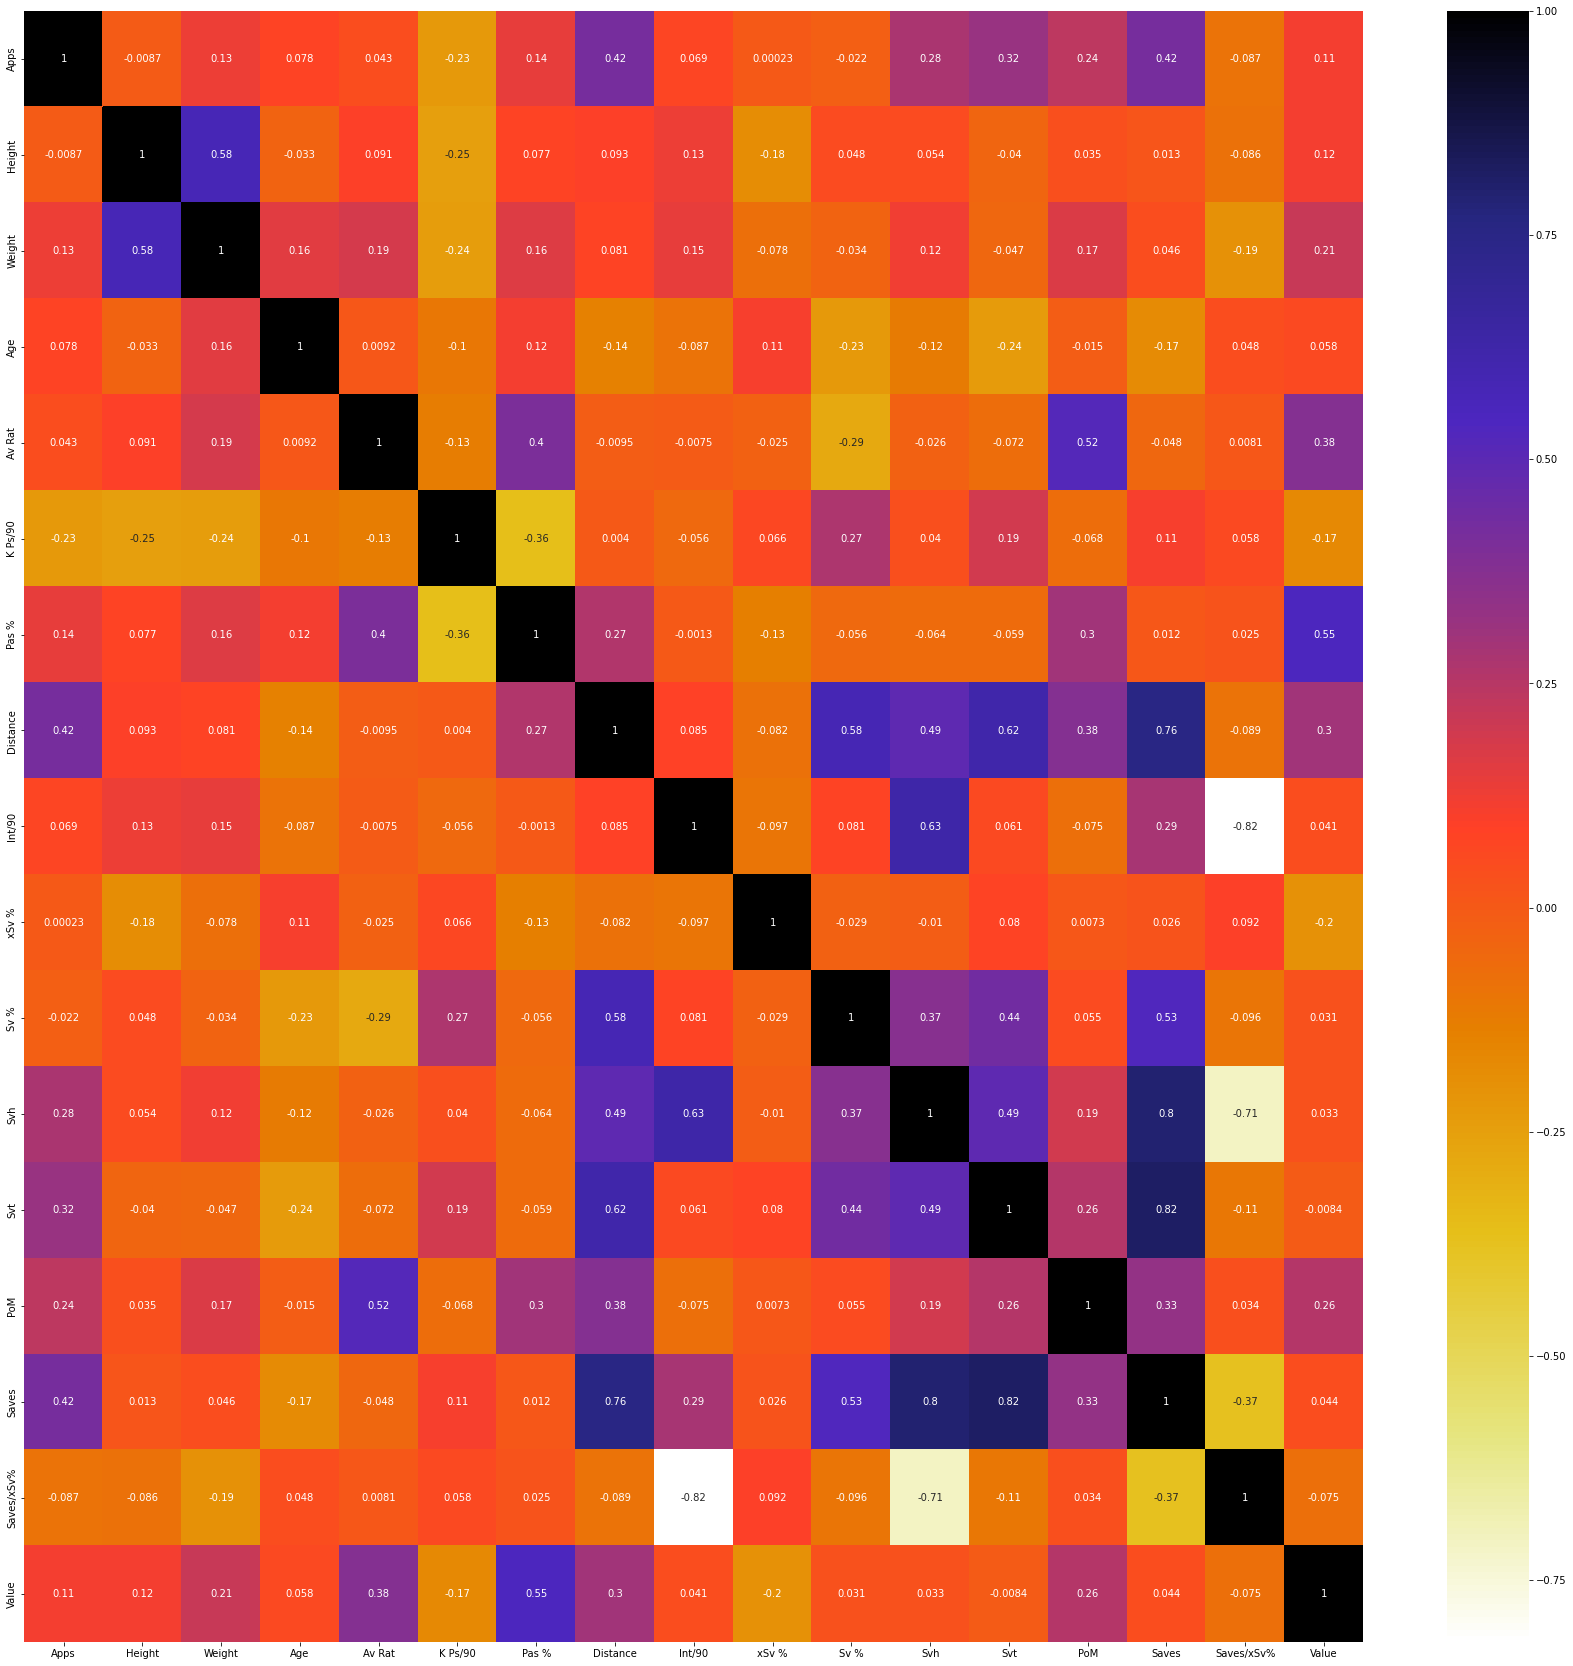

In [42]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = C.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(C, 0.80)
len(set(corr_features))

1

In [45]:
corr_features

{'Saves'}

In [46]:
Final_XGB = XGBRegressor(gamma= 0.1, learning_rate= 0.15, max_depth= 3, n_estimators= 50, reg_lambda= 5)

Final_XGB.fit(X_train, y_train)
                       

[06:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.1, learning_rate=0.15, n_estimators=50, reg_lambda=5)

In [47]:
y_pred = Final_XGB.predict(X_test)

In [48]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)
print('Adjusted R2 Score:', adj_r2)
print('RMSE:', rmse)

Mean Absolute Error: 7.1680655240143
R2 Score: 0.7888934249731264
Adjusted R2 Score: 0.6727517609019245
RMSE: 9.801604443327555


In [49]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  95.34122821975261


In [50]:
import pickle 
pickle.dump(Final_XGB,open('model_GoalKeepers.pkl','wb'))

In [51]:
pickle.dump(Final_XGB,open('regmodel.pkl','wb'))

In [52]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

[06:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
## Prediction